# <font color = 'red'> ЛР 6. Метод k-ближайших соседей. Классификаторы на различных данных. </font>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [4]:
import warnings
warnings.filterwarnings("ignore") 

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 1.11.2023

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Метод k-ближайших соседей.  </font>

Метод ближайщих соседей - один из самых интуитивно понятных но в тоже время эффективных методов класссификации.

Общая идея метода.

1. Предварительное обучение не требуется. Прогноз делается на основе известных данных.
2. Для тестового вектора признаков $\overline{x_{0}}$ находим ближайшие $k$ в пространстве признаков с помощью заданной метрики.
3. Классифицируем $\overline{x_{0}}$  по большинству меток представителей множества $k$ соседей из п 2. 

Подробнее [тут](https://habr.com/ru/articles/149693/) 


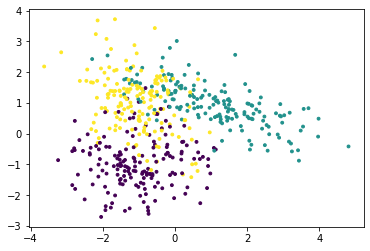

In [4]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

X,y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_classes=3, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1],c=y,s=8)

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственную учебную функцию для классификации методом k-ближайших соседей.
2. Протестируйте полученную вами функцию на искусственных тестовых данных.
3. Обучите на тех же данных классификатор с помощью встроенного класса *KNeighborsClassifier*.
4. Сравните работу полученных моеделей.
5. Изучите и эмпирически протестируйте гиперпараметры моделей для вашей и встроенной функции.
6. Можно ли переобучить классификатор k-ближайших соседей? Эмпирически подтвердите!

In [154]:
def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b)**p)**(1/p)


class myKNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test, distance_function, p = 2):
        predictions = []
        for test_point in X_test:
            distances = []
            for train_point in self.X_train:
                distance = distance_function(test_point, train_point, p)
                distances.append(distance)
            distances = np.array(distances)
            knn = np.argsort(distances)[:self.k]
            labels = y_train[knn]
            prediction = np.argmax(np.bincount(labels))
            predictions.append(prediction)     
        return np.array(predictions)

In [155]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [158]:
knn = myKNN(k = 3)
knn.fit(X_train, y_train)
my_predictions = knn.predict(X_test, minkowski_distance, p=3)

print("Test Predictions:", accuracy_score(y_test,predictions))

Test Predictions: 1.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski', p=3)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print("Test Predictions:", accuracy_score(y_test,predictions))

NameError: name 'X_train' is not defined

In [159]:
print(my_predictions)
print(predictions)

[0 1 0 1 0 2 1 1 0 0 2 2 1 1 0 2 2 2 2 2 0 2 0 1 2 1 0 2 1 0]
[0 1 0 1 0 2 1 1 0 0 2 2 1 1 0 2 2 2 2 2 0 2 0 1 2 1 0 2 1 0]


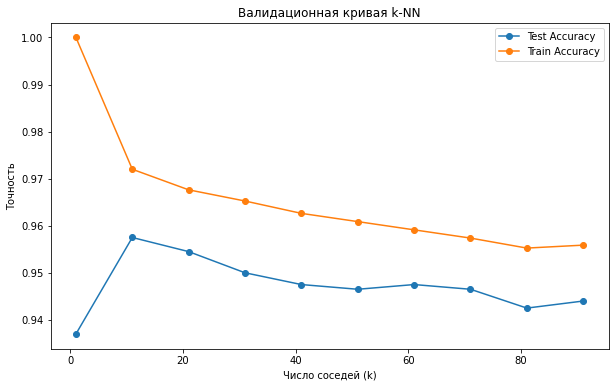

In [163]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = np.array(range(1,100,10))

test_accuracies = []
train_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)
    
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.title('Валидационная кривая k-NN')
plt.xlabel('Число соседей (k)')
plt.ylabel('Точность')
plt.legend()
plt.show()


ДОП кривая обучения 

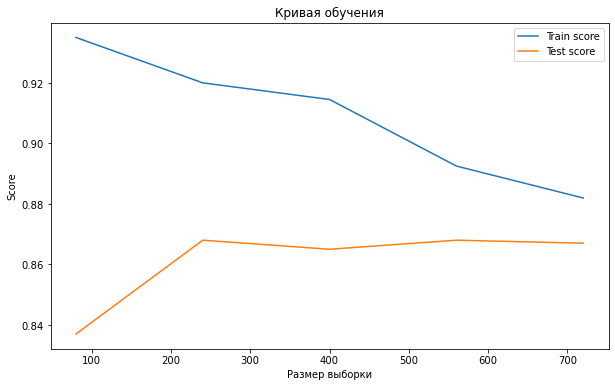

In [39]:
from sklearn.model_selection import learning_curve

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

model = LogisticRegression()

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9])

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Размер выборки')
plt.ylabel('Score')
plt.title('Кривая обучения')
plt.legend()
plt.show()


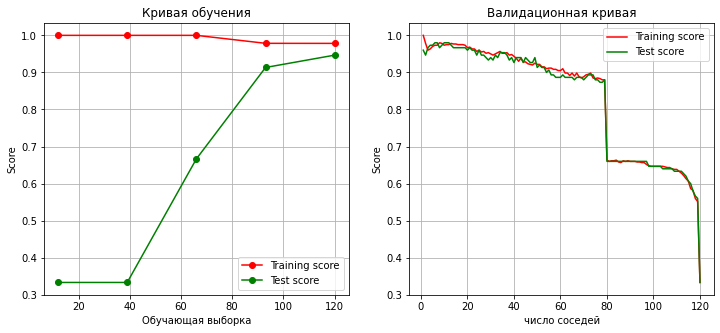

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

overfitted_knn = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Кривая обучения")
plt.xlabel("Обучающая выборка")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(overfitted_knn, X, y, cv=5,scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

plt.legend(loc="best")


plt.subplot(1, 2, 2)
plt.title("Валидационная кривая")
plt.xlabel("число соседей")
plt.ylabel("Score")
param_range = np.arange(1, 151)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.grid()

plt.plot(param_range, train_scores_mean, '-', color="r", label="Training score")
plt.plot(param_range, test_scores_mean, '-', color="g", label="Test score")

plt.legend(loc="best")

plt.show()

## <font color = 'green'> 2. Элементарная работа с изображениями  </font>

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

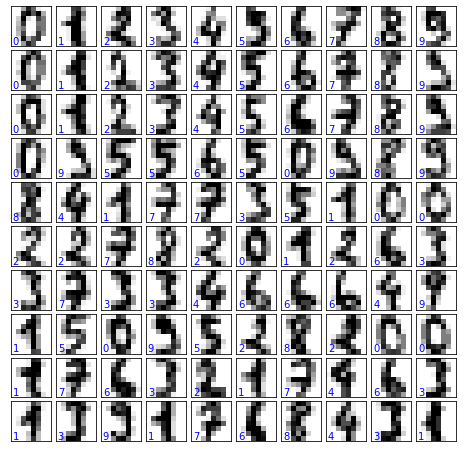

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

In [14]:
X = digits.data
X.shape

(1797, 64)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать изображения как векторы числовых признаков?
2. Реализуйте классификатор для определения цифры на изображении используя различные модели, изученные в ЛР4-ЛР6. 
3. Тщательно оцените качество полученных моделей и сделайте выводы.

In [15]:
from sklearn import metrics

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.9861111111111112


In [16]:
from sklearn.tree import DecisionTreeClassifier

lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)
lr_accuracy = metrics.accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.9722222222222222
Decision Tree Accuracy: 0.8416666666666667


In [17]:
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, lr_pred))

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.8

## <font color = 'green'> 3. Работа с текстом.  </font>

Текстовые признаки также можно сводить к числовым. Для этого существует ряд подходов, которые изучаются подробно в отдельном разделе науки о данных. Наша задача изучить один из них. TF-IDF -векторизацию.

Подробнее [тут](https://yandex.ru/q/datascience/8268666625/).

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

test = X.toarray()
test

array([[0.        , 0.27824521, 0.4711101 , 0.4711101 , 0.        ,
        0.        , 0.        , 0.4711101 , 0.        , 0.        ,
        0.35829137, 0.35829137, 0.        ],
       [0.40619178, 0.31544415, 0.        , 0.        , 0.53409337,
        0.53409337, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40619178, 0.        ],
       [0.32412354, 0.25171084, 0.        , 0.        , 0.        ,
        0.        , 0.4261835 , 0.        , 0.4261835 , 0.4261835 ,
        0.32412354, 0.        , 0.4261835 ]])

In [21]:
vectorizer.vocabulary_

{'it': 3,
 'is': 2,
 'going': 1,
 'to': 10,
 'rain': 7,
 'today': 11,
 'am': 0,
 'not': 4,
 'outside': 5,
 'watch': 12,
 'the': 9,
 'season': 8,
 'premiere': 6}

<font color = 'red' size = 5>Задание 3 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать тексты как векторы числовых признаков?
2. Реализуйте классификатор (на основе любой изученной вами модели) для определения эмоционального оттенка отзывов к фильмам. 
   Для преобразования текста используйте векторизацию TF-IDF. Предварительно минимально обработайте текст (стоп-слова, леммантизатор, посторонние символы) 
3. Тщательно оцените качество полученных моделей и сделайте выводы.

**Учитывайте, что векторизатор значительно увеличивает количество фич! Будьте внимательны со скоростью и производительностью!**

[Датасет](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [22]:
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer

In [25]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [27]:
from nltk.tokenize import word_tokenize 

In [28]:
import re
imdb_data["review"] = imdb_data["review"].apply(lambda x: x.lower()) 

imdb_data["review"] = imdb_data["review"].apply(lambda x: re.sub("[^0-9a-zA-Z]"," ", x))

clean_html = re.compile('<.*?>')
imdb_data["review"] = imdb_data["review"].apply(lambda x: re.sub(clean_html, "", x))

imdb_data["review"] = imdb_data["review"].apply(lambda x: lemmatizer.lemmatize(x, pos ="a"))
imdb_data["review"] = imdb_data["review"].apply(lambda x: lemmatizer.lemmatize(x, pos ="v"))
imdb_data["review"] = imdb_data["review"].apply(lambda x: lemmatizer.lemmatize(x, pos ="n"))

imdb_data["review"] = imdb_data["review"].apply(lambda x: re.sub(" +"," ", x) )

In [29]:
imdb_data["review"] = list(filter(lambda word: word not in stopwords.words('english'), imdb_data["review"]))

In [30]:
vectorizer = TfidfVectorizer(use_idf = True,
                             lowercase = True, 
                             strip_accents='ascii',
                             stop_words=stop_words)

In [31]:
X = vectorizer.fit_transform(imdb_data["review"])

label_encoding = {
    "positive": 1,
    "negative": 0
}

y = imdb_data["sentiment"].map(label_encoding).to_list()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
X_train

<35000x101068 sparse matrix of type '<class 'numpy.float64'>'
	with 3426681 stored elements in Compressed Sparse Row format>

In [34]:
model = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.7394666666666667


In [35]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      7411
           1       0.71      0.83      0.76      7589

    accuracy                           0.74     15000
   macro avg       0.75      0.74      0.74     15000
weighted avg       0.75      0.74      0.74     15000



In [36]:
X_train.shape

(35000, 101068)

In [37]:
model_2 = LogisticRegression(solver='sag')
model_2.fit(X_train,y_train)

pred = model_2.predict(X_test)

accurancy = accuracy_score(y_test, pred)
accurancy

0.8964

In [38]:
y_pred = model_2.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.8964


In [39]:
cv_scores = cross_val_score(model_2, X_test, y_test, cv = 5)
print('Cross validation scores (5 folds): {}'.format(cv_scores))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores)))

Cross validation scores (5 folds): [0.882      0.877      0.88366667 0.88033333 0.87733333]
The average cross validation score (5 folds): 0.8800666666666667


In [40]:
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [41]:
misclassified_indices = np.where(y_pred != y_test)[0]

In [42]:
for index in misclassified_indices[20:22]:
    print(f"True Label: {y_test[index]}, Predicted Label: {int(y_pred[index])}")
    words = imdb_data["review"][index].split()
    result = '  '.join([''.join(word) for word in words])
    print("Review:", ''.join(result))
    print("\n" + "="*50 + "\n")

True Label: 1, Predicted Label: 0
Review: the  film  quickly  gets  to  a  major  chase  scene  with  ever  increasing  destruction  the  first  really  bad  thing  is  the  guy  hijacking  steven  seagal  would  have  been  beaten  to  pulp  by  seagal  s  driving  but  that  probably  would  have  ended  the  whole  premise  for  the  movie  br  br  it  seems  like  they  decided  to  make  all  kinds  of  changes  in  the  movie  plot  so  just  plan  to  enjoy  the  action  and  do  not  expect  a  coherent  plot  turn  any  sense  of  logic  you  may  have  it  will  reduce  your  chance  of  getting  a  headache  br  br  i  does  give  me  some  hope  that  steven  seagal  is  trying  to  move  back  towards  the  type  of  characters  he  portrayed  in  his  more  popular  movies


True Label: 1, Predicted Label: 0
Review: no  one  can  say  i  wasn  t  warned  as  i  have  read  the  reviews  both  user  external  but  like  most  of  us  attracted  to  horror  movies  curiosit

## <font color = 'green'> 4. Обзор простейших моделей классификации.  </font>

<font color = 'red' size = 5>Задание 4 </font>


1. Проведите предварительную обработку данных.
2. Постройте модели классификации на основе различных методов, изученных вами из встроееной библиотеки. 
3. Подберите оптимальные гиперпараметры моделей используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей. Выберите самую оптимальную. Тщательно поясните свой выбор!

[Датасет](https://www.kaggle.com/c/titanic/data?select=test.csv)






In [101]:
df = pd.read_csv('train.csv')

In [102]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)

In [106]:
df = pd.get_dummies(df, columns=['Pclass'], dtype=int)
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [107]:
label = LabelEncoder()
   
df['Sex_Code'] = label.fit_transform(df['Sex'])
df['Embarked_Code'] = label.fit_transform(df['Embarked'])

In [108]:
df['Name'].str.split(" ", expand=True)[1].unique()
title_pattern = r'(Mr\.|Mrs\.|Miss\.|Master\.|Don\.|Rev\.|Dr\.|Ms\.|Major\.|Col\.|Capt\.| Lady\.|Mme\.|Sir\.|Mlle\.|Jonkheer\.)'
df['Title'] = df['Name'].str.extract(title_pattern, expand=False)

df['Title']=df['Title'].fillna('0')

In [109]:
df = df.drop(['Name', "Sex", "Embarked", "Ticket", "Cabin"], axis = 1)

In [110]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_Code,Embarked_Code,Title
0,1,0,22.0,1,0,7.2500,0,0,1,1,2,Mr.
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,Mrs.
2,3,1,26.0,0,0,7.9250,0,0,1,0,2,Miss.
3,4,1,35.0,1,0,53.1000,1,0,0,0,2,Mrs.
4,5,0,35.0,0,0,8.0500,0,0,1,1,2,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,1,2,Rev.
887,888,1,19.0,0,0,30.0000,1,0,0,0,2,Miss.
888,889,0,28.0,1,2,23.4500,0,0,1,0,2,Miss.
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,Mr.


In [111]:
df['Title_Code'] = label.fit_transform(df['Title'])

In [112]:
df = df.drop(["Title"], axis = 1)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_Code,Embarked_Code,Title_Code
0,1,0,22.0,1,0,7.2500,0,0,1,1,2,12
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,13
2,3,1,26.0,0,0,7.9250,0,0,1,0,2,9
3,4,1,35.0,1,0,53.1000,1,0,0,0,2,13
4,5,0,35.0,0,0,8.0500,0,0,1,1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,1,2,15
887,888,1,19.0,0,0,30.0000,1,0,0,0,2,9
888,889,0,28.0,1,2,23.4500,0,0,1,0,2,9
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,12


In [113]:
df['IsWomanOrChild'] = ((df.Age < 15) | (df.Sex_Code == 0))

In [114]:
df['IsWomanOrChild'] = label.fit_transform(df['IsWomanOrChild'])

In [115]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_Code,Embarked_Code,Title_Code,IsWomanOrChild
0,1,0,22.0,1,0,7.2500,0,0,1,1,2,12,0
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,13,1
2,3,1,26.0,0,0,7.9250,0,0,1,0,2,9,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,2,13,1
4,5,0,35.0,0,0,8.0500,0,0,1,1,2,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,1,2,15,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,2,9,1
888,889,0,28.0,1,2,23.4500,0,0,1,0,2,9,1
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,12,0


In [116]:
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_Code,Embarked_Code,Title_Code,IsWomanOrChild
PassengerId,1.000000,-0.005007,0.034212,-0.057527,-0.001652,0.012658,0.034303,-0.000086,-0.029486,0.042939,0.013128,0.024940,-0.040200
Survived,-0.005007,1.000000,-0.064910,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,-0.543351,-0.167675,-0.211684,0.559161
Age,0.034212,-0.064910,1.000000,-0.233296,-0.172482,0.096688,0.323896,0.015831,-0.291955,0.081163,-0.018754,0.285925,-0.245291
SibSp,-0.057527,-0.035322,-0.233296,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,-0.114631,0.068230,-0.197867,0.252715
Parch,-0.001652,0.081629,-0.172482,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,-0.245489,0.039798,-0.122864,0.348351
Fare,0.012658,0.257307,0.096688,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,-0.182333,-0.224719,-0.087352,0.183266
Pclass_1,0.034303,0.285904,0.323896,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,-0.098013,-0.237965,-0.075491,0.061171
Pclass_2,-0.000086,0.093349,0.015831,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,-0.064746,0.169245,0.076839,0.068603
Pclass_3,-0.029486,-0.322308,-0.291955,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,0.137143,0.067291,0.002507,-0.108538
Sex_Code,0.042939,-0.543351,0.081163,-0.114631,-0.245489,-0.182333,-0.098013,-0.064746,0.137143,1.000000,0.108262,0.272755,-0.910711


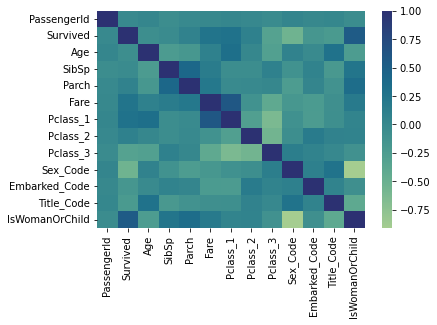

In [117]:
sns.heatmap(corr_matrix,cmap="crest");

In [118]:
target = 'Survived'
X = df.drop(columns= [target])
y = df[target]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Дерево

In [120]:
clf = DecisionTreeClassifier(random_state=123)
params =  {
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_depth': [1, 2, 3],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [121]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}

In [122]:
grid.best_score_

0.8298451612903227

In [123]:
best = grid.best_estimator_

In [124]:
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.8208955223880597


In [125]:
cv_scores = cross_val_score(best, X_test, y_test, cv = 5)
print('Cross validation scores: {}'.format(cv_scores))
print('The average cross validation score: {}'.format(np.mean(cv_scores)))

Cross validation scores: [0.77777778 0.7962963  0.7962963  0.79245283 0.8490566 ]
The average cross validation score: 0.802375960866527


In [126]:
y_pred = best.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



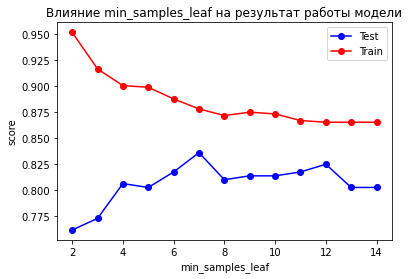

In [127]:
min_samples_leaf = list(range(2,15))
scores_test = []
scores_train = []

for i in min_samples_leaf:
    model = DecisionTreeClassifier(min_samples_leaf = i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_test.append(score)
    
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    scores_train.append(score)
    

plt.plot(min_samples_leaf, scores_test, 'b-o', label='Test')
plt.plot(min_samples_leaf, scores_train, 'r-o', label='Train')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.title('Влияние min_samples_leaf на результат работы модели')
plt.show()

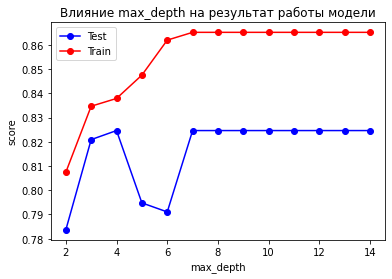

In [128]:
max_depth = list(range(2,15))
scores_test = []
scores_train = []

for i in max_depth:
    model = DecisionTreeClassifier(min_samples_leaf = 12, max_depth = i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_test.append(score)
    
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    scores_train.append(score)
    

plt.plot(max_depth, scores_test, 'b-o', label='Test')
plt.plot(max_depth, scores_train, 'r-o', label='Train')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Влияние max_depth на результат работы модели')
plt.show()

In [129]:
model = DecisionTreeClassifier(min_samples_leaf = 12, max_depth = 7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.8246268656716418


In [130]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



In [131]:
from sklearn.metrics import roc_auc_score

## K-ближайших соседей

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
clf = KNeighborsClassifier()
params = {
    'n_neighbors': np.arange(1,10),
    'weights' : ['uniform', 'distance'],
    'metric' : ['manhattan', 'euclidean'],
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [134]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

In [135]:
grid.best_score_

0.6692774193548388

In [136]:
best = grid.best_estimator_

In [137]:
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.6492537313432836


In [138]:
cv_scores = cross_val_score(best, X_test, y_test, cv = 5)
print('Cross validation scores (5 folds): {}'.format(cv_scores))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores)))

Cross validation scores (5 folds): [0.66666667 0.7037037  0.7037037  0.56603774 0.67924528]
The average cross validation score (5 folds): 0.6638714185883996


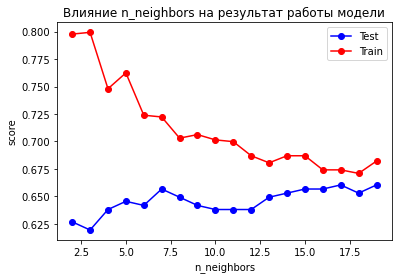

In [139]:
n_neighbors = list(range(2,20))
scores_test = []
scores_train = []

for i in n_neighbors:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_test.append(score)
    
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    scores_train.append(score)
    

plt.plot(n_neighbors, scores_test, 'b-o', label='Test')
plt.plot(n_neighbors, scores_train, 'r-o', label='Train')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.title('Влияние n_neighbors на результат работы модели')
plt.show()

## Логистическая регрессия

In [140]:
target = 'Survived'
X = df.drop(columns= [target])
y = df[target]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X.values)
poly = PolynomialFeatures(degree=3) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.28,random_state=28)

In [141]:
model_2 = LogisticRegression(solver='sag')
model_2.fit(X_train,y_train)

pred = model_2.predict(X_test)

accurancy = accuracy_score(y_test, pred)
accurancy

0.812

In [142]:
clf = LogisticRegression()
params = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C' : np.logspace(-5, 5, 10),
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [143]:
grid.best_params_

{'C': 0.0001291549665014884, 'solver': 'liblinear'}

In [144]:
grid.best_score_

0.8300629844961239

In [145]:
best = grid.best_estimator_

In [146]:
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.808


In [147]:
cv_scores = cross_val_score(best, X_test, y_test, cv = 5)
print('Cross validation scores (5 folds): {}'.format(cv_scores))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores)))

Cross validation scores (5 folds): [0.8  0.84 0.78 0.8  0.8 ]
The average cross validation score (5 folds): 0.8039999999999999


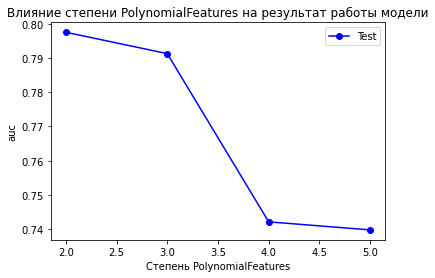

In [148]:
degrees = list(range(2,6))
scores_test = []

for i in degrees:
    poly = PolynomialFeatures(degree=i) 
    scaled_data_1 = poly.fit_transform(scaled_data)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    
    pred_proba = model.predict_proba(X_test)[::,1]
    auc = roc_auc_score(y_test, pred_proba)
    scores_test.append(auc)
    

plt.plot(degrees, scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('Степень PolynomialFeatures')
plt.ylabel('auc')
plt.title('Влияние степени PolynomialFeatures на результат работы модели')
plt.show()

In [149]:
poly = PolynomialFeatures(degree=2) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
best = LogisticRegression(C=0.0016, solver='liblinear')
best.fit(X_train, y_train)
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.8022388059701493


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       165
           1       0.81      0.63      0.71       103

    accuracy                           0.80       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



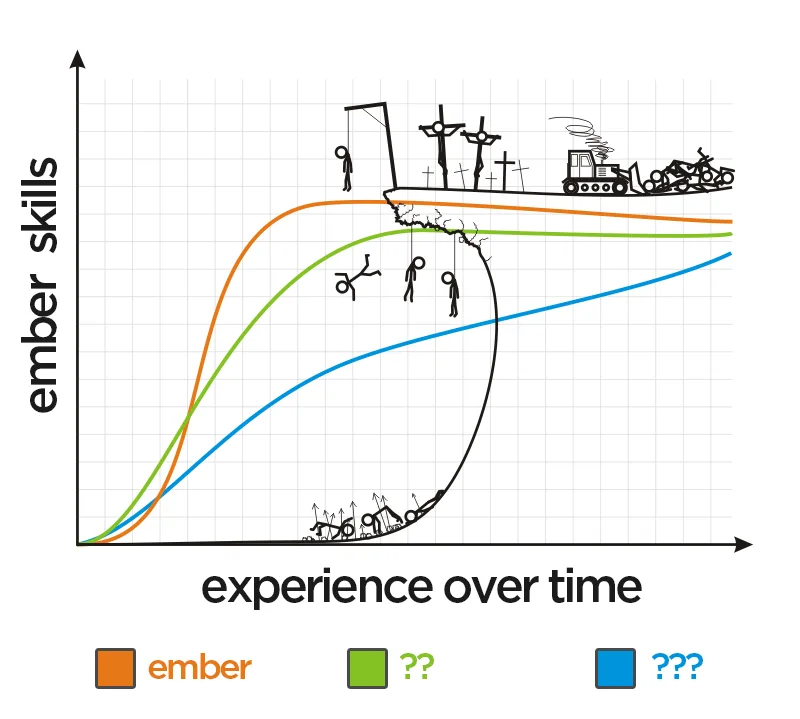